# making size plots

In [2]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
homedir = os.getenv("HOME")
tabledir = homedir+'/Work/Virgo_outskirts/Catalogs/vf-tables/v2/2023-07-12/'
plotdir = homedir+'/Work/Virgo_outskirts/Plots/'
#tabledir = homedir+'/research/Virgo/tables-north/v2/2022-08-20/'
#plotdir = homedir+'/research/Virgo/plots/'

In [6]:
%run ~/Work/Virgo_outskirts/Rfinn_github/Virgo/programs/readtablesv2.py  --tabledir $tabledir
#%run ~/github/Virgo/programs/readtablesv2.py --tabledir $tabledir

In [234]:
#v.ephot.colnames
#v.halpha.colnames
#v.galfit_r.colnames
#v.galfit_W1.colnames
v.co.colnames


['VFID',
 'RAgas',
 'DECgas',
 'COreference',
 'alphaCO',
 'Mmol',
 'Mmol_err_up',
 'Mmol_err_down',
 'r21',
 'err_r21',
 'tdep',
 'tdep_err_up',
 'tdep_err_down',
 'HIreference',
 'MHI',
 'MHI_err_up',
 'MHI_err_down',
 'MH2_to_MHI',
 'MH2_to_MHI_err_up',
 'MH2_to_MHI_err_down',
 'H2def',
 'errH2def',
 'HIdef',
 'errHIdef',
 'Separation']

### Compare different size measurements

  VFID  
--------
VFID1277
VFID2726
VFID2789
VFID2865
VFID3019
VFID3202
VFID3442
VFID5897
VFID6468


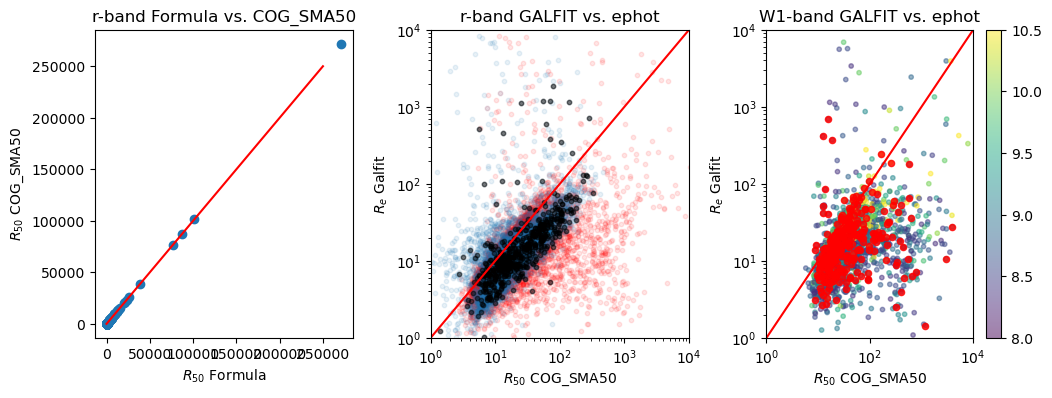

In [190]:
#pixel scales needed to convert Galfit results to arcsec
pixscale_W1 = 2.75
pixscale_r = 0.262

#####
#plot galaxies with HAobsflag from main table in a different color

#use John's parametric fit to get r50
#https://www.legacysurvey.org/sga/sga2020/#ellipse-fitting
r0 = 10.0 #arcsec, a fixed paraemter
r50_r = r0 * ( (1 / v.ephot['COG_ALPHA1_R']) * (np.exp(-1. * np.log10(0.5) / (0.4 * v.ephot['COG_M0_R'])) - 1 ))**(-1. / v.ephot['COG_ALPHA2_R'])

#check that the COG_SMA50_<BAND> is identical to the formula from the web page.  
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(wspace=0.3)
ax1.scatter(r50_r, v.ephot['COG_SMA50_R'])
x = np.linspace(0,2.5e5,10)
ax1.plot(x,x,'r-')
ax1.set_xlabel(r'$R_{50}$ Formula')
ax1.set_ylabel(r'$R_{50}$ COG_SMA50')
ax1.set_title('r-band Formula vs. COG_SMA50')

goodrad = (v.ephot['COG_SMA50_R']>0) & (v.galfit_r['CRE'] > 1) 
goodradha = goodrad & v.halpha['HAobsflag']

ax2.scatter(v.ephot['COG_SMA50_R'][goodrad], v.galfit_r['CRE'][goodrad]*pixscale_r, alpha = 0.1, s=10,c='r')
#sc2 = ax2.scatter(v.ephot['COG_SMA50_R'][goodrad], v.galfit_r['CRE'][goodrad]*pixscale_r, alpha = 0.5, s=10,c=v.magphys['logMstar'][goodrad],cmap='viridis')
ax2.scatter(v.ephot['SMA_SB24'][goodrad], v.galfit_r['CRE'][goodrad]*pixscale_r, alpha = 0.1, s=10)
ax2.scatter(v.ephot['SMA_SB24'][goodradha], v.galfit_r['CRE'][goodradha]*pixscale_r, alpha = 0.5, s=10, c='k')
#fig.colorbar(sc2)
x = np.linspace(0,2.5e5,10)
ax2.plot(x,x,'r-')
ax2.set_ylabel(r'$R_{e}$ Galfit')
ax2.set_xlabel(r'$R_{50}$ COG_SMA50')
ax2.set_title('r-band GALFIT vs. ephot')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1, 1.e4)
ax2.set_ylim(1, 1.e4)
#ax2.set_xlim(-1, 20)
#ax2.set_ylim(-1., 20)

goodradmass = goodrad & (v.magphys['logMstar']>8.3)
goodradlomass = goodrad & (v.magphys['logMstar']<=8.3)
goodradhamass = goodradha & (v.magphys['logMstar']>8.3)

#ax3.scatter(v.ephot['COG_SMA50_W1'][goodrad], v.galfit_W1['CRE'][goodrad]*pixscale_W1, alpha = 0.1, s=10)
sc3 = ax3.scatter(v.ephot['COG_SMA50_W1'][goodradmass], v.galfit_W1['CRE'][goodradmass]*pixscale_W1, alpha = 0.5, s=10,c=v.magphys['logMstar'][goodradmass],cmap='viridis',vmin=8,vmax=10.5)
#sc3 = ax3.scatter(v.ephot['COG_SMA50_W1'][goodradlomass], v.galfit_W1['CRE'][goodradlomass]*pixscale_W1, alpha = 0.5, s=10, c='r')
ax3.scatter(v.ephot['COG_SMA50_W1'][goodradhamass], v.galfit_W1['CRE'][goodradhamass]*pixscale_W1, alpha = 0.8, s=20, c='r')
fig.colorbar(sc3)
x = np.linspace(0,2.5e5,10)
ax3.plot(x,x,'r-')
ax3.set_ylabel(r'$R_{e}$ Galfit')
ax3.set_xlabel(r'$R_{50}$ COG_SMA50')
ax3.set_title('W1-band GALFIT vs. ephot')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim(1, 1.e4)
ax3.set_ylim(1, 1.e4)
#ax3.set_xlim(-1, 20.)
#ax3.set_ylim(-1, 20.)

lgalflag = goodradha & (v.ephot['COG_SMA50_W1']>1000.)
np.sum(lgalflag)
print(v.main['VFID'][lgalflag])

Formula and SMA50 are identical.  

In middle panel the red points are COG_SMA50 and the blue points are SB24.  

There are clear problems with the COG_SMA50 values 

All the ones with COG_SMA50_W1>1000 either are low SB or have some problems with the available images.

Text(0, 0.5, '$R_{50}(r) / R_{50}(W1)$')

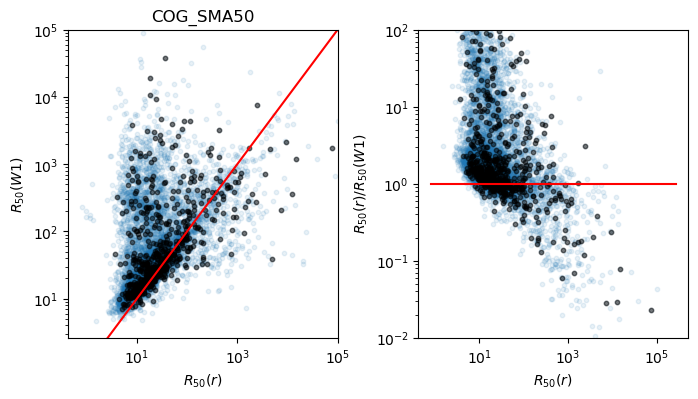

In [158]:
#R-band SMA50 vs. W1 SMA50
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)
#hftot/hftoterr>3
goodrad = (v.ephot['COG_SMA50_R']>0) & (v.ephot['COG_SMA50_W1'] > 0) & (v.ephot['COG_SMA50_W1']<1.e6)
goodradha = goodrad & v.halpha['HAobsflag']
r_rad = v.ephot['COG_SMA50_R'] 
W1_rad = v.ephot['COG_SMA50_W1'] 
ax1.scatter(r_rad[goodrad],W1_rad[goodrad], alpha=0.1, s=10)
ax1.scatter(r_rad[goodradha],W1_rad[goodradha], alpha=0.5, s=10, c='k')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0,1.e5)
ax1.set_ylim(0,1.e5)
xline = np.linspace(min(r_rad[goodrad]),max(r_rad[goodrad]),10)
ax1.plot(xline,xline,'r-')

ax1.set_xlabel(r'$R_{50}(r)$')
ax1.set_ylabel(r'$R_{50}(W1)$')
ax1.set_title('COG_SMA50')

W1_rrat = W1_rad / r_rad
ax2.scatter(r_rad[goodrad], W1_rrat[goodrad], alpha=0.1, s=10)
ax2.scatter(r_rad[goodradha], W1_rrat[goodradha], alpha=0.5, s=10, c='k')
xline = np.linspace(min(r_rad[goodrad]),max(r_rad[goodrad]),2)
ax2.plot(xline,[1,1],'r-')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(0.01,100)
ax2.set_xlabel(r'$R_{50}(r)$')
ax2.set_ylabel(r'$R_{50}(r) / R_{50}(W1)$')


51


Text(0, 0.5, '$R_{e}(W1) / R_{e}(r)$')

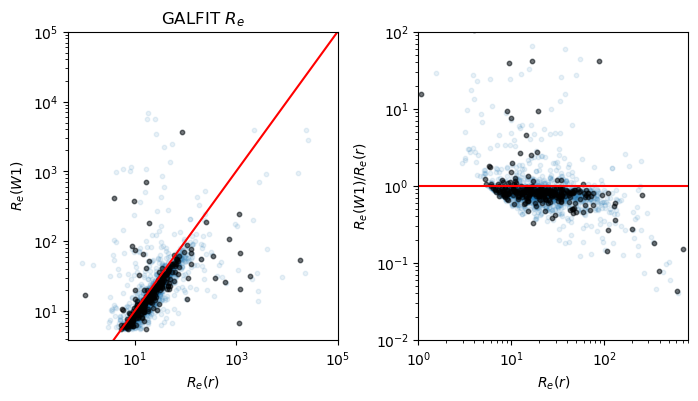

In [200]:
#GALFIT r-band Re vs. W1 Re
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)
#hftot/hftoterr>3
goodrad = (v.galfit_r['CRE']>2) & (v.galfit_W1['CRE'] > 2)
#goodrad = (v.galfit_r['CRE']>-1) & (v.galfit_W1['CRE'] > -1)
goodradha = goodrad & v.halpha['HAobsflag']
goodradmass = goodrad & (v.magphys['logMstar']>8.3)
goodradhamass = goodradha & goodradmass

#zerorad = ((v.galfit_r['CRE']==0) | (v.galfit_W1['CRE'] ==0))& (v.magphys['logMstar']>8.3)& v.halpha['HAobsflag']
zerorad = ((v.galfit_r['CRE']==0))& (v.magphys['logMstar']>8.3) & v.halpha['HAobsflag'] & (v.halpha['HF_TOT']/v.halpha['HF_TOT_ERR'] > 3)
print(np.sum(zerorad))

r_rad = v.galfit_r['CRE'] * pixscale_r 
W1_rad = v.galfit_W1['CRE'] * pixscale_W1
ax1.scatter(r_rad[goodradmass],W1_rad[goodradmass], alpha=0.1, s=10)
ax1.scatter(r_rad[goodradhamass],W1_rad[goodradhamass], alpha=0.5, s=10, c='k')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0,1.e5)
ax1.set_ylim(0,1.e5)
#ax1.set_xlim(-1, 20)
#ax1.set_ylim(-1, 20)
xline = np.linspace(min(r_rad[goodrad]),max(r_rad[goodrad]),10)
ax1.plot(xline,xline,'r-')

ax1.set_xlabel(r'$R_{e}(r)$')
ax1.set_ylabel(r'$R_{e}(W1)$')
ax1.set_title(r'GALFIT $R_e$')

W1_rrad = W1_rad / r_rad
ax2.scatter(r_rad[goodradmass], W1_rrad[goodradmass], alpha=0.1, s=10)
ax2.scatter(r_rad[goodradhamass], W1_rrad[goodradhamass], alpha=0.5, s=10,c='k')
xline = np.linspace(min(r_rad[goodrad]),max(r_rad[goodrad]),2)
ax2.plot(xline,[1,1],'r-')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(0.01,100)
ax2.set_xlim(1.,800)
ax2.set_xlabel(r'$R_{e}(r)$')
ax2.set_ylabel(r'$R_{e}(W1) / R_{e}(r)$')

  VFID  
--------
VFID0601
VFID1163
VFID1221
VFID1363
VFID1628
VFID1842
     ...
VFID3618
VFID4662
VFID6135
VFID6276
VFID6408
VFID6603
Length = 34 rows


(array([ 3., 56., 43., 31., 25., 25., 28., 16., 15., 13.,  8., 10.,  5.,
         4.,  6.,  6.,  2.,  5.,  4.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57]),
 <BarContainer object of 19 artists>)

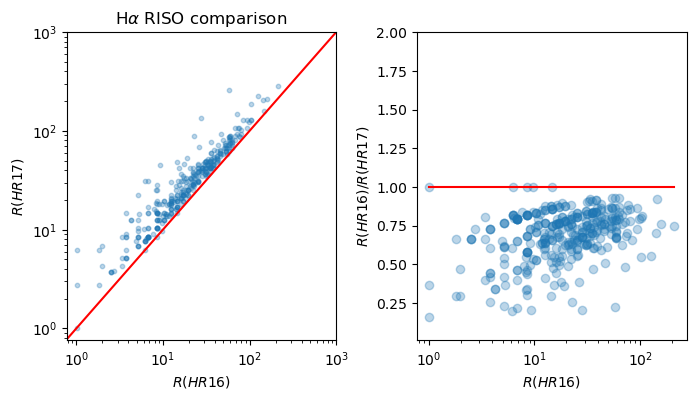

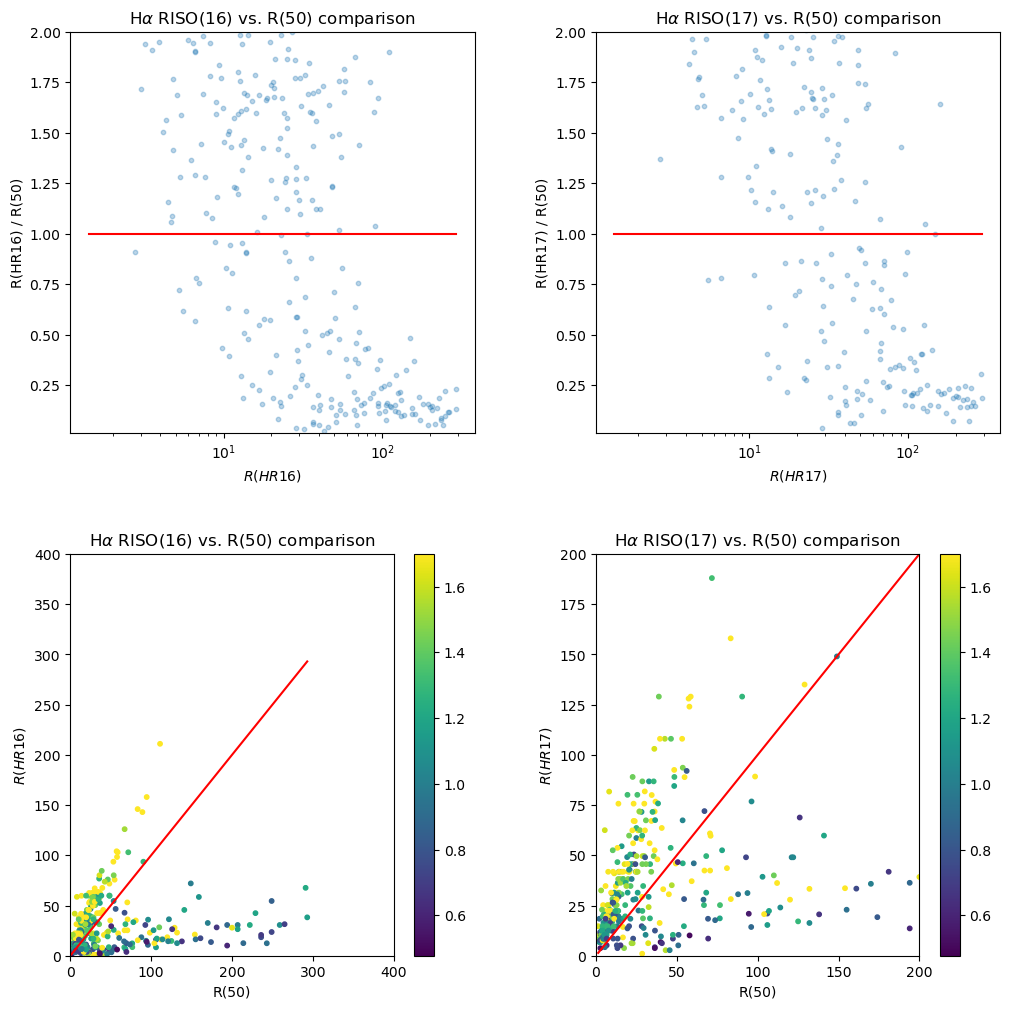

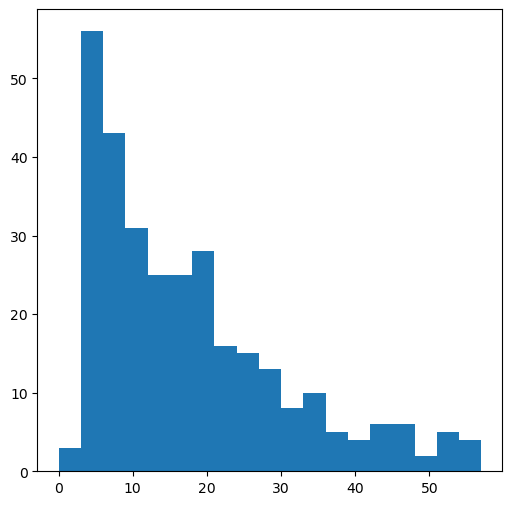

In [233]:
#Halpha ISO radii against each other
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)
#hftot/hftoterr>3
goodrad = (v.halpha['HR16'] > 1) & (v.halpha['HR17'] > 1) & (v.halpha['GAL_HR_F50'] > 1) & (v.halpha['HF_TOT']/v.halpha['HF_TOT_ERR'] > 3)

ax1.scatter(v.halpha['HR16'][goodrad],v.halpha['HR17'][goodrad], alpha=0.3, s=10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0,1.e3)
ax1.set_ylim(0,1.e3)
xline = np.linspace(min(r_rad[goodrad]),max(r_rad[goodrad]),10)
ax1.plot(xline,xline,'r-')

ax1.set_xlabel(r'$R(HR16)$')
ax1.set_ylabel(r'$R(HR17)$')
ax1.set_title(r'H$\alpha$ RISO comparison')

hr16_17_rat = v.halpha['HR16']/v.halpha['HR17']
ax2.scatter(v.halpha['HR16'][goodrad], hr16_17_rat[goodrad], alpha=0.3)
xline = np.linspace(min(v.halpha['HR16'][goodrad]),max(v.halpha['HR16'][goodrad]),2)
ax2.plot(xline,[1,1],'r-')
ax2.set_xscale('log')
ax2.set_ylim(0.01,2.0)
ax2.set_xlabel(r'$R(HR16)$')
ax2.set_ylabel(r'$R(HR16) / R(HR17)$')

#Halpha ISO vs. flux fraction radii against each other
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

hr16_r50_rat = v.halpha['HR16']/v.halpha['HR_F50']
ax1.scatter(v.halpha['HR_F50'][goodrad],hr16_r50_rat[goodrad], alpha=0.3, s=10)
xline = np.linspace(min(v.halpha['HR_F50'][goodrad]),max(v.halpha['HR_F50'][goodrad]),2)
ax1.plot(xline,[1,1],'r-')
ax1.set_xscale('log')
ax1.set_ylim(0.01,2.0)
ax1.set_xlabel(r'$R(HR16)$')
ax1.set_ylabel(r'R(HR16) / R(50)')
ax1.set_title(r'H$\alpha$ RISO(16) vs. R(50) comparison')

hr17_r50_rat = v.halpha['HR17']/v.halpha['HR_F50']
ax2.scatter(v.halpha['HR_F50'][goodrad],hr17_r50_rat[goodrad], alpha=0.3, s=10)
xline = np.linspace(min(v.halpha['HR_F50'][goodrad]),max(v.halpha['HR_F50'][goodrad]),2)
ax2.plot(xline,[1,1],'r-')
ax2.set_xscale('log')
ax2.set_ylim(0.01,2.0)
ax2.set_xlabel(r'$R(HR17)$')
ax2.set_ylabel(r'R(HR17) / R(50)')
ax2.set_title(r'H$\alpha$ RISO(17) vs. R(50) comparison')

sc3 = ax3.scatter(v.halpha['HR_F50'][goodrad],v.halpha['HR16'][goodrad], alpha=1, s=10, c = np.log10(v.halpha['HF_TOT'][goodrad]/v.halpha['HF_TOT_ERR'][goodrad]), cmap = 'viridis', vmin = np.log10(3), vmax = np.log10(50.))
#ax3.scatter(v.halpha['HR_F50'][goodrad],v.halpha['HR16'][goodrad], alpha=0.3, s=10)
fig.colorbar(sc3,ax=ax3)
xline = np.linspace(min(v.halpha['HR_F50'][goodrad]),max(v.halpha['HR_F50'][goodrad]),2)
ax3.plot(xline,xline,'r-')
ax3.set_xlim(0,400)
ax3.set_ylim(0,400)
ax3.set_ylabel(r'$R(HR16)$')
ax3.set_xlabel(r'R(50)')
ax3.set_title(r'H$\alpha$ RISO(16) vs. R(50) comparison')

sc4 = ax4.scatter(v.halpha['HR_F50'][goodrad],v.halpha['HR17'][goodrad], alpha=1, s=10, c = np.log10(v.halpha['HF_TOT'][goodrad]/v.halpha['HF_TOT_ERR'][goodrad]), cmap = 'viridis', vmin = np.log10(3), vmax = np.log10(50.))
fig.colorbar(sc4,ax=ax4)
xline = np.linspace(min(v.halpha['HR_F50'][goodrad]),max(v.halpha['HR_F50'][goodrad]),2)
ax4.plot(xline,xline,'r-')
ax4.set_xlim(0,200)
ax4.set_ylim(0,200)
ax4.set_ylabel(r'$R(HR17)$')
ax4.set_xlabel(r'R(50)')
ax4.set_title(r'H$\alpha$ RISO(17) vs. R(50) comparison')

highisorad = (v.halpha['HR_F50'][goodrad] > 100) & (v.halpha['HR17'][goodrad] < 50) & (v.halpha['HF_TOT'][goodrad]/v.halpha['HF_TOT_ERR'][goodrad] > 3)
print(v.main['VFID'][goodrad][highisorad])

fig,ax1 = plt.subplots(1,1,figsize=(6,6))
goodrad = (v.halpha['HR16'] > 1)
plt.hist(v.halpha['HF_TOT']/v.halpha['HF_TOT_ERR'],bins=np.arange(0,60,3))

Galaxies with high R50 and low HR16 (or 17) have COG problems probably stemming from sky subtraction.  We see this when looking at the postage stamps.

It looks like HR17 isn't reliable because we don't go deep enough.  This is more apparent when looking at the postage stamps.  

Cutting on SNR>10 does not get rid of galaxies with abnormally large R(50)

`v.halpha['HF_TOT'][goodrad]/v.halpha['HF_TOT_ERR'][goodrad]` is not a good SNR value because HF_TOT is not measured in a robust way.  It is just the maximum flux measured amongst some pixels exceeding some SNR, or something like that (ask Rose)